In [ ]:
!pip install opencv-python
#OpenCV is a Python library that allows you to perform image processing and computer vision tasks.
#It provides a wide range of features, including object detection, face recognition, and tracking. 


In [1]:
# Import necessary modules.

import cv2
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [2]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20
#this can be set at the later stage after trying different iterartions, this ones are the best fit value for my model

In [3]:
#lets import data sets from kears
from tensorflow.keras.datasets import cifar10

In [4]:

#if in case data set doesnt run you can use this:
import requests
import ssl

# Bypass SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

# Download CIFAR-10 dataset
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
response = requests.get(url)


In [5]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
# Print the shape of dataset.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
# Print the shape of dataset.
print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'train samples')
print(y_test.shape[0], 'test samples')

y_train shape: (50000, 1)
50000 train samples
10000 test samples


- The training set contains 50000 images.
- The size of each image is 32x32 pixels.
- Each image has 3 color channels.

In [8]:
x_train[0, :, :, :].shape  #checking shape of the x_train by index 

(32, 32, 3)

## Highlights:
- How to select the 10th image?
- How to get the red pixels only?
- What is the shape of resulting array?

In [9]:
y_train #the output of the training sets

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train[2][0] #output of the the 2nd index in the training set

9

In [11]:
#lets label the index for better understanding
label_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

Label 
 Label Id: 5 
 Name: dog


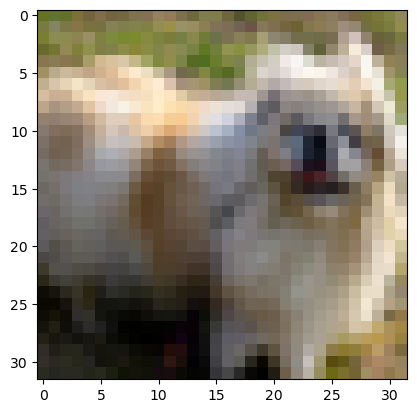

In [12]:
#lets check the image and the label for the 40th data from x_train and y_train
i = 40
image = x_train[i]
label = y_train[i][0]
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);
#pixel is less, hence the quality of image seems bad, 
#as this code is just for learning purspose, no problem with the the training set with less pixel

- As the image quality is not good, the edges are not so good. But still we can visualize that there are edges.

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Please Note:
There are many tools to one-hot encode and they differ in syntax, but the keras one is probably best implemented.
- `keras.utils.to_categorical`
- `sklearn.preprocessing.OneHotEncoder`
- `pandas get_dummies`

In [14]:
y_train.shape #lets reshape it using onehot encoder, below shown are two ways, you can use the one which works best for you

(50000, 1)

In [15]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [16]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [21]:
#y_train, it can be seen now as, 1 where it is positive with the image
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
#second method for the same
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

pd.get_dummies(y)

In [18]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu")) #one hidden layer with 256 neurons
model.add(layers.Dropout(0.5))

# softmax
model.add(layers.Dense(10, activation="softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)       

In [19]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [20]:
# Let's train the model 
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [21]:
#standarizing the data
x_train = x_train.astype('float32') # Conversion to float type from integer type.
x_test = x_test.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0

In [22]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value.
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [23]:
x_train.shape[0]

50000

In [24]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Epoch 1/100


1563/1563 [==============================] - ETA: 0s - loss: 1.9025 - accuracy: 0.3065
Epoch 1: val_loss improved from inf to 1.97054, saving model to cifar_cnn_checkpoint_01_loss1.9705.h5
1563/1563 [==============================] - 103s 61ms/step - loss: 1.9025 - accuracy: 0.3065 - val_loss: 1.9705 - val_accuracy: 0.3391
Epoch 2/100
1563/1563 [==============================] - ETA: 0s - loss: 1.5339 - accuracy: 0.4355
Epoch 2: val_loss improved from 1.97054 to 1.75330, saving model to cifar_cnn_checkpoint_02_loss1.7533.h5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5339 - accuracy: 0.4355 - val_loss: 1.7533 - val_accuracy: 0.4593
Epoch 3/100
1563/1563 [==============================] - ETA: 0s - loss: 1.3836 - accuracy: 0.5023
Epoch 3: val_loss improved from 1.75330 to 1.23336, saving model to cifar_cnn_checkpoint_03_loss1.2334.h5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3836 - accuracy: 0.5023 - val_loss: 1.2334 - v

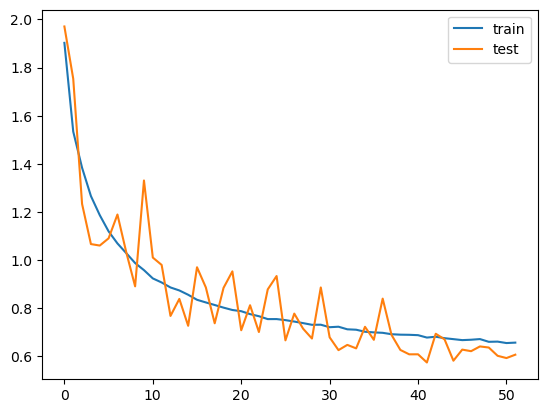

In [25]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=100,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#for learning purpose less epochs is choosen, you should tune this hyperparameter for better performance

In [26]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
# sigmoid

313/313 [==============================] - 7s 22ms/step - loss: 0.6071 - accuracy: 0.7912
Test loss: 0.6071414351463318
Test accuracy: 0.7911999821662903


In [27]:
predictions = model.predict(x_test)

313/313 [==============================] - 9s 22ms/step


In [28]:
preds = pd.DataFrame(predictions)
preds

,0,1,2,3,4,5,6,7,8,9
0,1.085919e-04,1.776379e-04,0.000682,0.582963,0.000526,0.314984,0.099586,1.553694e-04,5.201016e-04,2.958412e-04
1,6.605163e-03,2.580067e-01,0.000073,0.000268,0.000003,0.000003,0.000027,2.000701e-06,7.347930e-01,2.179122e-04
2,1.644520e-02,1.034624e-02,0.000529,0.003659,0.000160,0.000023,0.000211,9.543000e-05,9.672819e-01,1.249581e-03
3,9.325504e-01,4.512614e-04,0.011549,0.002303,0.002365,0.000132,0.000329,9.004054e-05,4.985923e-02,3.700473e-04
4,7.867246e-06,1.356194e-05,0.004512,0.001868,0.001040,0.000052,0.992479,9.727671e-07,2.054046e-05,6.564836e-06
...,...,...,...,...,...,...,...,...,...,...
9995,4.390072e-01,9.073644e-04,0.022465,0.112056,0.018362,0.016399,0.006648,2.214676e-03,3.812161e-01,7.258818e-04
9996,2.422249e-06,2.352338e-07,0.000811,0.529121,0.001928,0.411737,0.056266,1.334896e-04,2.703421e-07,8.486892e-07
9997,3.970541e-08,8.770414e-09,0.000059,0.004642,0.000003,0.995146,0.000013,1.380672e-04,6.583101e-08,2.728436e-08
9998,5.757232e-02,8.837342e-01,0.006984,0.009757,0.011011,0.003464,0.016252,4.518481e-04,5.465144e-03,5.309378e-03
